# INTRODUCTION

DANS CE PROJET NOUS ALLONS ETUDIER LES DONNEES DE LA BANQUE MONDIALE. 

EN PARTICULIER LES DONNEES STATISTIQUES SUR L'EDUCATION. 

AFIN D'ETUDIER LA POSSIBILITE DE DEPLOIEMENT DE LA SOCIETE A L'INTERNATIONALE


# PARTIE 1 : ETUDE DES DIFFERENTS FICHIERS

In [1033]:
# COMMENCONS PAR IMPORTER LES LIBRAIRIES NECESSAIRES 
import numpy as np # POUR LE CALCUL MATRICIEL NOTAMMENT
import pandas as pd # POUR LES DATAFRAMES
import matplotlib.pyplot as plt # POUR LES REPRESENTATIONS GRAPHIQUES

import seaborn as sns # POUR CREER DES HEATMAP ET AUTRE

# ***<u> P1 - 1) FICHIER : EdStatsCountry</u>***

In [1034]:
# DEFINITION DU PATH
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsCountry.csv'

In [1035]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_Country = pd.read_csv(path)

In [1036]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_Country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [1037]:
Nombre_Original_Colonne = 32
Nombre_Original_Ligne = 241

DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE "Country Code"

IL COMPORTE 32 COLONNES COMME LE "Country Code" QUI SERT D'IDENTIFIANT

LES DIFFERENTS NOMS (SHORT, TABLE, LONG)

LE PIB (HIGH, LOW ...)

DES DATES DE RECENSEMENT DE LA POPULATION ET DES PARCELLES AGRICOLES ET AUTRES


In [1038]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

CE FICHIER CONTIENT  241 LIGNES NUMEROTEES DE 0 A 240 ET 32 COLONNES NUMEROTEES DE 0 A 31. 

IL COMPORTE 4 COLONNES DE TYPES FLOAT (NOMBRES DECIMAUX) ET 28 DE TYPE OBJECT (CHAINE DE CARACTERES). 

ON CONSTATE QUE LA COLONNE N° 31 "Unnamed: 31" EST ENTIEREMENT VIDE, EN EFFET ELLE CONTIENT 0 NON-NULL. 

D'AUTRES COMME LA N°16 "Alternative conversion factor" OU ENCORE LA N°11 "National accounts reference year" NE SONT QUE PEU REMPLIES. 

D'AUTRES COMME LA N°5 "Currency Unit" SONT QUASIMENT COMPLETES. ENFIN DES COLONNES TELLES QUE LA N°1 "Short Name" sont complétes. 

In [1039]:
# ON VA COMMENCER PAR CONSERVER LES PAYS QUI CONTIENNENT DES INFORMATIONS DANS LA COLONNE "Vital registration complete"
# CETTE VARIABLE INDIQUE SI LES DEMARCHES ADMINISTRATIVES SONT CORRECTEMENT EFFECTUEES DANS LE PAYS
# CE QUI ME SEMBLE UN BON CHOIX POUR OBTENIR DES DONNEES FIABLES

Fichier_Country=Fichier_Country.loc[(Fichier_Country['Vital registration complete']=='Yes. Vital registration for Guernsey and Jersey.') | 
                                    (Fichier_Country['Vital registration complete']=='Yes')]
Lignes_Conservées=Fichier_Country.shape[0]
print(f"Nous avons éliminé {round(100-Lignes_Conservées*100/Nombre_Original_Ligne,2)} % des lignes")

Nous avons éliminé 53.94 % des lignes


In [1040]:
# ON VA DROP LES COLONNES CONTENANT PLUS DE 30% DE NaN

Liste_à_drop = []
for features in Fichier_Country.columns:
    if Fichier_Country[features].isnull().sum()>0.3*Fichier_Country.shape[0]:
        Liste_à_drop.append(features)
print("Noms des lignes éliminées")
for col in Liste_à_drop:
    print(col)
Fichier_Country=Fichier_Country.drop(Liste_à_drop,axis=1)
print()
print(f"Nous avons éliminé {round(len(Liste_à_drop)*100/Nombre_Original_Colonne,2)} % des colonnes")


Noms des lignes éliminées
Special Notes
National accounts reference year
Lending category
Other groups
Alternative conversion factor
PPP survey year
External debt Reporting status
Latest household survey
Source of most recent Income and expenditure data
Latest agricultural census
Latest industrial data
Unnamed: 31

Nous avons éliminé 37.5 % des colonnes


# ***<u> P1 - 2) FICHIER EdStatsCountry-Series</u>***


In [1041]:
# DEFINITION DU PATH
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsCountry-Series.csv'

In [1042]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_Country_Series = pd.read_csv(path)

In [1043]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_Country_Series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE "CountryCode"

IL COMPORTE 4 COLONNES COMME LE "CountryCode" QUI SERT D'IDENTIFIANT

UNE COLONNE NOMMEE "SeriesCode" EN LIEN CERTAINEMENT AVEFC LE FICHIER "EdStatsSeries"

UNE COLONNE "DESCRIPTION" INDIQUANT LA SOURCE DES INFOS. ON CONSTATE QUE LES SOURCES VARIENT. CERTAINES OFFICIELLES COMME L'ONU. D'AUTRES OBTENUES PAR REGRESSION

UNE COLONNE "Unnamed: 3" CERTAINEMENT ENTIEREMENT VIDE COMME SUR LE FICHIER PRECEDENT

In [1044]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_Country_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


CE FICHIER CONTIENT  ***613 LIGNES*** NUMEROTEES DE 0 A 612 ET ***4 COLONNES*** NUMEROTEES DE 0 A 3. IL COMPORTE *****1 COLONNE DE TYPES FLOAT***** (NOMBRES DECIMAUX) ET ***3 DE TYPE OBJECT*** (CHAINE DE CARACTERES).

ON CONSTATE QUE LA COLONNE N° 3 "Unnamed: 3" EST ENTIEREMENT VIDE, EN EFFET ELLE CONTIENT 0 NON-NULL. QUANT AU RESTE DES COLONNES ELLES SONT COMPLETES. 

In [1045]:
# DROP "Unnamed: 3"

Fichier_Country_Series=Fichier_Country_Series.drop(['Unnamed: 3'],axis=1)
print(f"Ici nous avons éliminé 25% des colonnes")

Ici nous avons éliminé 25% des colonnes


# ***<u> P1 - 3) FICHIER EdStatsData</u>***

In [1046]:
# DEFINITION DU PATH
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsData.csv'

In [1047]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_Data = pd.read_csv(path)

In [1048]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE "Country Name", CEPENDANT ICI IL SEMBLE PLUTOT S'AGIR DE GROUPE GEOGRAPHIQUE COMME Arab World (Monde Arabe) OU ENCORE East Asia & Pacific (Espace Asie Pacifique). IL FAUDRA EXPLORER PLUS EN PROFONDEUR CES RENSEIGNEMENTS

IL COMPORTE 70 COLONNES COMME LE "Country Code" QUI SERT D'IDENTIFIANT

DEUX COLONNES NOMMEES "Country Name" ET "Country Code" QUI REPRESENTENT EN FAIT LES CODE DE REGIONS GEOGRAPHIOQUES AINSI QUE LEUR VERSIONS ABREGEES (EX : Arab World -> ARB)

DEUX COLONNES NOMMEES "Indicator Name" ET "Indicator Code" QUI SONT L'INDICATEUR ETUDIE AINSI QUE SON ABREVIATION (EX : Adujstment... -> UIS.NERA.2)

LA DERNIERE NOMMEE "Unnamed: 69" CERTAINEMENT VIDE COMME SUR LES FICHIERS PRECEDENT

QUANT AUX 65 COLONNES RESTANTES ELLES REPRESENTENT TOUTES UNE ANNE DIFFERENTES CONTENANT LES VALEURS CONNUES POUR L'INDICATEUR PRECISE DANS LA COLONNE "Indicator Name" A LA DATE INDIQUEE PAR LA COLONNE. LES ANNEES AVANCENT D'UN PAS DE 1 DE 1970 A 2017 INCLUS PUIS AVANCENT D'UN PAS DE 5 DE 2020 A 2100 INCLUS.




In [1049]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      


CE FICHIER CONTIENT  886930 LIGNES NUMEROTEES DE 0 A 886929 ET 70 COLONNES NUMEROTEES DE 0 A 69. 

IL COMPORTE 66 COLONNE DE TYPES FLOAT (NOMBRES DECIMAUX) ET 4 DE TYPE OBJECT (CHAINE DE CARACTERES). 


ON CONSTATE QUE LA COLONNE N° 69 "Unnamed: 69" EST ENTIEREMENT VIDE, EN EFFET ELLE CONTIENT 0 NON-NULL. 

LES ANNEES TERMINANT PAR 0 OU 5 ENTRE 1970 ET 1990 INCLUS SONT MIEUX RENSEIGNEES QUE LES AUTRES SUR LA MEME PERIODE. CE PHENOMENE SE REPETE DE 1990 A 2000 BIEN QUE SUR CETTE PERIODE LES "FAIBLES" RENSEIGNEMENTS ONT TOUT DE MEME DOUBLES EN VALEUR ABSOLUE. A PARTIR DES ANNEES 1999-2000 JUSQU'EN 2015 LES RENSEIGNEMENTS VONT DE 120K A 200K VOIR 240K. 

2016 ET 2017 SONT TRES MAL RENSEIGNEES 

LES COLONNES N°52 JUSQU'A 68 c.à.d. DE L'ANNEE 2020 JUSQU'A L'ANNEE 2100 COMPORTE TOUTES 51436 VALEURS NON NULLES (CERTAINEMENT DES PROJECTIONS DE VALEURS)


# ***<u> P1 - 4) FICHIER EdStatsFootNote</u>***

In [1050]:
# DEFINITION DU PATH
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsFootNote.csv'

In [1051]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_FootNote = pd.read_csv(path)

In [1052]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_FootNote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN



DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE "CountryCode", ABW POUR ARUBA COMME ON A PU LE VOIR DANS LE 1ER FICHIER

IL COMPORTE 5 COLONNES COMME LE "CountryCode" QUI SERT D'IDENTIFIANT

UNE COLONNE "CountryCode" REFERENCANT LA ZONE GEOGRAPHIQUE

UNE COLONNE NOMMEE "SeriesCode" REFERENCANT LE CODE DE LA SERIE DE DONNEES

UNE COLONNE "Year" RENSEIGNANT L'ANNEE A LAQUELLE SE RAPPORTE LA SERIE

UNE COLONNE "DESCRIPTION" EXPLIQUANT SI LA DONNEE EST UNE ESTIMATION OU UNE DONNEE COLLECTEE

LA DERNIERE NOMMEE "Unnamed: 4" CERTAINEMENT VIDE COMME SUR LES FICHIERS PRECEDENT


In [1053]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_FootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB



CE FICHIER CONTIENT  643638 LIGNES NUMEROTEES DE 0 A 643637 ET 5 COLONNES NUMEROTEES DE 0 A 4. IL COMPORTE 1 COLONNE DE TYPES FLOAT (NOMBRES DECIMAUX) ET 4 DE TYPE OBJECT (CHAINE DE CARACTERES). 

ON CONSTATE QUE LA COLONNE N° 4 "Unnamed: 4" EST ENTIEREMENT VIDE, EN EFFET ELLE CONTIENT 0 NON-NULL. 

QUANT AUX AUTRES COLONNE ELLES SONT TOUTES COMPLETES


In [1054]:
# DROP "Unnamed: 4"

Fichier_FootNote=Fichier_FootNote.drop(['Unnamed: 4'],axis=1)
print("Ici nous avons éliminé 20% des colonnes")

Ici nous avons éliminé 20% des colonnes


# ***<u> P1 - 5) FICHIER EdStatsSeries</u>***

In [1055]:
# DEFINITION DU PATH
path=r'C:\Users\lenovo\Desktop\OpenClassrooms\PROJET_OC\PROJET_2\RESSOURCES\Projet+Python_Dataset_Edstats_csv\EdStatsSeries.csv'

In [1056]:
# CREATION DU DATAFRAME CORRESPONDANT
Fichier_Series = pd.read_csv(path)

In [1057]:
# ETUDE DES 5 PREMIERES LIGNES DU DATAFRAME
Fichier_Series.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN



DE PRIME ABORD ON PEUT CONSTATER QUE CE FICHIER EST TRIE PAR ORDRE ALPHABETIQUE DE "Series Code", IL SEMBLERAIT QUE DANS LE NOM SE TROUVE LA TRanCHE D'AGE ETUDIE PAR EXEMPLE 1519 POUR LES 15-19 ANS.

L'ENSEMBLE DES COLONNES A POUR BUT DE RENSEIGNER LA MANIERE DONT ONT ETE COLLECTEES LES DONNEES, LES SOURCES UTILISEES, LES UNITES DE MESURES...

In [1058]:
# RENTRONS PLUS EN DETAIL DANS L'EXPLORATION DE CE DATAFRAME
Fichier_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    


CE FICHIER CONTIENT  3665 LIGNES NUMEROTEES DE 0 A 3664 ET 21 COLONNES NUMEROTEES DE 0 A 20. IL COMPORTE 6 COLONNE DE TYPES FLOAT (NOMBRES DECIMAUX) ET 15 DE TYPE OBJECT (CHAINE DE CARACTERES). 

A NOTER QUE TOUTES LES COLONNES DE TYPES FLOAT SONT ENTIEREMENT VIDES

# FIN ETUDE PRELIMINAIRE

# PARTIE 2 : CHOIX DES FEATURE ET ANALYSE

## AVANT PROPOS

LE FICHIER "Fichier_Series" NE SEMBLE PAS PERTINENT POUR L'ANALYSE (IL DETAILLE EN FAIT LA METHODOLOGIE APPLIQUEE POUR RECUEUILLIR L'ENSEMBLE DES DONNEES)

DE MEME POUR "Fichier_Footnote" AINSI QUE "Fichier_Country_Series" QUI LA AUSSI SONT DES FICHIERS DE METHODOLOGIE.

## SELECTION DES DONNEES

NOUS ALLONS PRENDRE LA MOYENNE DES INFORMATIONS FOURNIES DANS LE DATAFRAME "Fichier_Data" DES ANNEES 2011 A 2015 AFIN D'AVOIR DES DONNEES EXPLOITABLES

In [1059]:
# MOYENNE DES VALEURS DE 2011 A 2015
Fichier_Data['Periode 2011-2015']=Fichier_Data[['2011', '2012', '2013', '2014', '2015']].mean(axis=1)
Fichier_Data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Periode 2011-2015
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183071.500000
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.679410
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.656455
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.046085
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.591220


### PIVOT TABLE

In [1060]:
# ON VA MAINTENANT CREER UN DATAFRAME DONT LES COLONNES SERONT "COUNTRY CODE"
# AINSI QUE CHAQUE INDICATOR Name PRESENTS DANS LA COLONNE "INDICATOR NAME" ACTUELLE.
# POUR LES VALEURS DE CES COLONNES NOUS UTILISERONS LES VALEURS "PERIODE 2011-2015"

DF_pivot=Fichier_Data.pivot(index='Country Code',columns='Indicator Name',values='Periode 2011-2015')
DF_pivot=DF_pivot.reset_index()

DF_pivot


Indicator Name,Country Code,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net enrolment rate, upper secondary, both sexes (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
0,ABW,78.047157,82.111633,1.108400,74.081360,99.307243,99.427483,1.002370,99.191917,58.249889,...,5.01,12.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,49.032011,35.857401,0.582715,61.497005,NaN,NaN,NaN,NaN,31.874825,...,NaN,NaN,62.453490,2947366.00,1840733.0,1106633.0,46.990050,32.113220,0.518970,61.879070
2,AGO,NaN,NaN,NaN,NaN,84.012306,73.047318,0.769500,94.928574,NaN,...,NaN,NaN,66.264950,1047558.00,694164.0,353394.0,77.431130,70.585130,0.831760,84.862380
3,ALB,88.222420,87.744015,0.989560,88.671955,95.299061,94.326884,0.984623,95.798124,68.868717,...,513.24,1030.33,51.844640,5424.50,2733.5,2691.0,99.011295,98.938215,0.998840,99.053670
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,47.808900,0.00,0.0,0.0,100.000000,100.000000,1.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,YEM,43.159821,34.723160,0.677170,51.277050,85.120102,77.733551,0.842990,92.212486,27.361885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5880.03,11703.48,34.280522,119946.25,41094.5,78852.0,98.877440,99.184065,1.006198,98.573375
240,ZMB,NaN,NaN,NaN,NaN,90.392649,91.600863,1.026913,89.196421,NaN,...,634.93,953.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ON A MAINTENANT UN DF CONTENANT 242 LIGNES (UNE PAR COUNTRY CODE) ET 3666 COLONNES (DIVERS INDICATEURS)

VERIFIONS QUE LES DONNEES SONT AU BON ENDROIT

In [1061]:
Fichier_Data.loc[(Fichier_Data['Indicator Name']=='Adjusted net intake rate to Grade 1 of primary education, both sexes (%)') 
                  & (Fichier_Data['Country Code']=='ZMB'),'Periode 2011-2015']

879612    61.57795
Name: Periode 2011-2015, dtype: float64

In [1062]:
DF_pivot.loc[DF_pivot['Country Code']=='ZMB','Adjusted net intake rate to Grade 1 of primary education, both sexes (%)']

240    61.57795
Name: Adjusted net intake rate to Grade 1 of primary education, both sexes (%), dtype: float64

ON RETROUVE LES MEMES VALEURS PARFAIT

### VISUALISATION DES DONNEES

In [1063]:

# CALCULER LE POURCENTAGE DE NAN POUR CHAQUE COLONNES
POURCENTAGE_NAN = DF_pivot.isnull().mean() * 100


ICI DF_PIVOT.ISNULL() EST UN DATA FRAME DE MEME TAILLE QUE DF_PIVOT COMPOSE DE BOOLEENS TRUE SI LA VALEUR EST NAN FALSE SINON

ENSUITE .MEAN() CALCULE LA MOYENNE PAR COLONNE (1 POUR TRUE ET 0 POUR FALSE)

EN MULTIPLIANT CETTE MOYENNE PAR 100 ON OBTIENT LE POURCENTAGE DE NAN PRESENTS DANS CHAQUE COLONNE

In [1064]:

# DEFINITION DE LA LIMITE DE NAN ACCEPTABLE
limite = 10


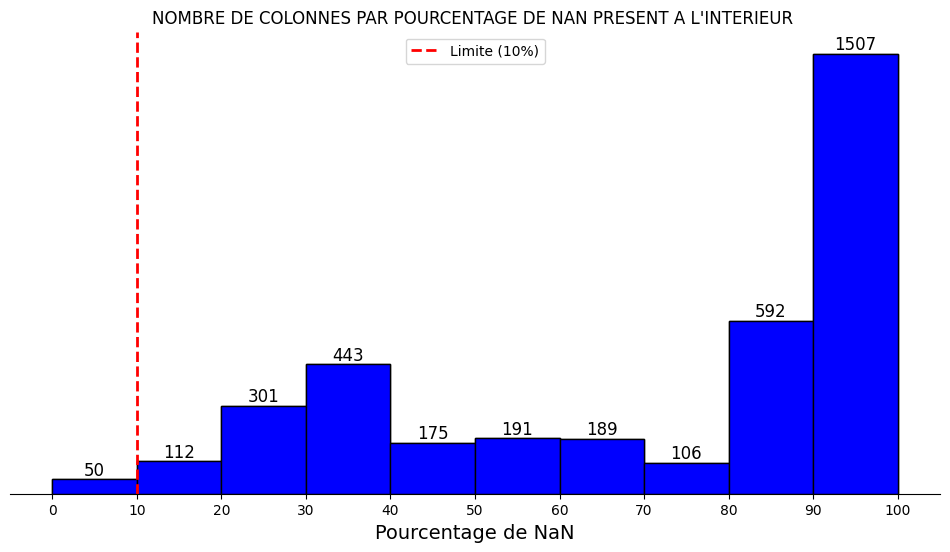

In [1065]:
# VISUALISATION AVEC UN HISTOGRAMME
plt.figure(figsize=(12, 6))
plt.hist(POURCENTAGE_NAN, bins=10, edgecolor='black',color='blue')

plt.axvline(limite, color='r', linestyle='--', linewidth=2, label=f'Limite ({limite}%)')
plt.title("NOMBRE DE COLONNES PAR POURCENTAGE DE NAN PRESENT A L'INTERIEUR ")
plt.xlabel("Pourcentage de NaN",fontsize=14)
plt.xticks(np.arange(0,101,10))

plt.legend()

ax=plt.gca() # commande permettant de créer un objet ax pour modifier les axes

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

patches=plt.hist(POURCENTAGE_NAN, bins=10, edgecolor='black',color='blue')[2] # collection des barres retournée par plt.hist

ax.bar_label(patches, label_type='edge', fontsize=12)

ax.yaxis.set_visible(False)
plt.show()



ON CONSTATE QU'UN GRAND NOMBRE D'INDICATEURS SONT REMPLIS DE MANIERE PARCELLAIRE

NOUS ALLONS A PARTIR D'ICI NOUS CONCENTRER SUR 4 INDICATEURS CLES :

"GDP, PPP (current international $)", (PIB par parité de pouvoir d'achat)

"Internet users (per 100 people)", (pourcentage d'utilisateurs internet)

"Unemployment, total (% of total labor force)", (taux de chomage)

"Population Cible" (colonne créée qui regroupe les entrées au secondaire (lycée) et secondaire supérieur et tertiaire (post bac))



## CREATION DU DATAFRAME AVEC LES INDICATEUYRS SELECTIONNES

In [1066]:
DF_pivot['Population Cible']=DF_pivot[['Enrolment in secondary education, both sexes (number)',
                                           'Enrolment in secondary general, both sexes (number)',
                                           'Enrolment in secondary vocational, both sexes (number)',
                                           'Enrolment in tertiary education, all programmes, both sexes (number)']].sum(axis=1)

In [1067]:
DF_pivot=DF_pivot[['Country Code','GDP, PPP (current international $)',
                   'Internet users (per 100 people)',
                   'Unemployment, total (% of total labor force)',
                   'Population Cible']]

In [1068]:
print(f"Ici nous avons conservé {round(8*100/3666,2)} % des colonnes dû à un manque de pertinence ou de complétude des colonnes éliminées")

Ici nous avons conservé 0.22 % des colonnes dû à un manque de pertinence ou de complétude des colonnes éliminées


In [1069]:
DF_pivot=DF_pivot.replace(0,np.nan)

In [1070]:
DF_pivot

Indicator Name,Country Code,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible
0,ABW,3.671232e+09,78.868245,NaN,1.788490e+04
1,AFG,5.815309e+10,6.322909,8.36,5.166116e+06
2,AGO,1.651242e+11,8.220000,6.20,1.964135e+06
3,ALB,3.130790e+10,56.841778,15.52,8.402830e+05
4,AND,NaN,90.848885,NaN,9.035000e+03
...,...,...,...,...,...
237,XKX,1.602620e+10,NaN,NaN,NaN
238,YEM,9.420280e+10,19.797382,17.32,3.658277e+06
239,ZAF,6.838833e+11,44.477823,24.80,1.090054e+07
240,ZMB,5.573077e+10,16.073640,8.92,7.837278e+05


## SELECTION DES PAYS AVEC DES DONNEES COMPLETES

ON CONSTATE QUE CERTAINS PAYS ONT ENCORE DES RENSEIGNEMENTS MANQUANTS

VERIFIONS CA


In [1071]:
# CALCULER LE POURCENTAGE DE NaN POUR CHAQUE PAYS
POURCENTAGE_NAN_LIGNE = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1).sort_values(ascending=False)
POURCENTAGE_NAN_LIGNE

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12620\439293931.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  POURCENTAGE_NAN_LIGNE = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1).sort_values(ascending=False)


Country Code
ASM    80.0
IMN    80.0
MNP    80.0
MAF    80.0
CHI    60.0
       ... 
WSM     0.0
YEM     0.0
ZAF     0.0
ZMB     0.0
ZWE     0.0
Length: 242, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12620\989527793.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


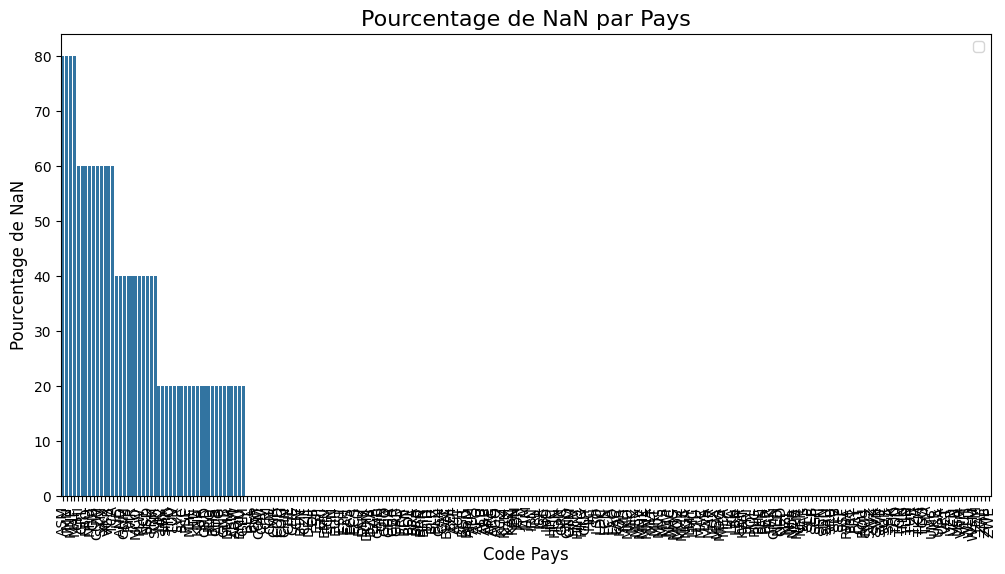

In [1072]:
# CREER LA FIGURE ET LES AXES
fig, ax = plt.subplots(figsize=(12, 6))

# CREER LE DIAGRAMME EN BARRE
sns.barplot(x=POURCENTAGE_NAN_LIGNE.index, y=POURCENTAGE_NAN_LIGNE.values, ax=ax)



# PERSONNALISATION DU GRAPHIQUE
ax.set_title('Pourcentage de NaN par Pays', fontsize=16)
ax.set_xlabel('Code Pays', fontsize=12)
ax.set_ylabel('Pourcentage de NaN', fontsize=12)
ax.tick_params(axis='x', rotation=90)  # Rotation des étiquettes de l'axe x

# AJOUTER UNE LEGENDE
ax.legend()

# AFFICHER LE GRAPHIQUE
plt.show()

ON PEUT VOIR SUR CE GRAPHIQUE QU'UNE PARTIE DES PAYS SEMBLENT N'AVOIR AUCUNE INFO MANQUANTES. 

NOUS ALLONS NOUS CONCENTRER SUR CES DERNIERS

In [1073]:
# CALCULER LE POURCENTAGE DE NaN POUR CHAQUE PAYS
POURCENTAGE_NAN_LIGNEs = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1)


# COMPTER LE NOMBRE DE PAYS COMPLETS
pays_complet = np.sum(POURCENTAGE_NAN_LIGNE <= 1)


print(f"Nombre de pays complets: {pays_complet}")


Nombre de pays complets: 194


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12620\2982750686.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  POURCENTAGE_NAN_LIGNEs = DF_pivot.groupby('Country Code').apply(lambda x: x.isna().mean() * 100).mean(axis=1)


IL Y A DONC 194 PAYS COMPLETS. 

NOUS ALLONS LES CONSERVER ET ELIMINER LES AUTRES

In [1074]:

# CALCULER LE POURCENTAGE DE NaN POUR CHAQUE LIGNE
nan_percentage = DF_pivot.isnull().mean(axis=1) * 100

# CREER UN MASQUE BOOLEEN POUR LES LIGNES A CONSERVER (CELLES AVEC <= 10% DE NaN)
mask = nan_percentage <= 10

# APPLIQUER LE MASQUE POUR NE GARDER QUE LES LIGNES AVEC <= 10% DE NaN
DF_pivot_cleaned = DF_pivot[mask]

print(f"Ici nous avons conservé {round(len(DF_pivot_cleaned)*100/len(DF_pivot),2)} % des pays")

Ici nous avons conservé 80.17 % des pays


In [1075]:
DF_pivot_cleaned


Indicator Name,Country Code,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible
1,AFG,5.815309e+10,6.322909,8.360000,5.166116e+06
2,AGO,1.651242e+11,8.220000,6.200000,1.964135e+06
3,ALB,3.130790e+10,56.841778,15.520000,8.402830e+05
5,ARB,5.632473e+12,33.530196,11.439652,7.201606e+07
6,ARE,5.777258e+11,86.379998,4.060000,1.335312e+05
...,...,...,...,...,...
236,WSM,1.100068e+09,17.165900,8.140000,5.176000e+04
238,YEM,9.420280e+10,19.797382,17.320000,3.658277e+06
239,ZAF,6.838833e+11,44.477823,24.800000,1.090054e+07
240,ZMB,5.573077e+10,16.073640,8.920000,7.837278e+05


In [1076]:
DF_pivot_cleaned=DF_pivot_cleaned.reset_index()
DF_pivot_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         194 non-null    int64  
 1   Country Code                                  194 non-null    object 
 2   GDP, PPP (current international $)            194 non-null    float64
 3   Internet users (per 100 people)               194 non-null    float64
 4   Unemployment, total (% of total labor force)  194 non-null    float64
 5   Population Cible                              194 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.2+ KB


In [1077]:
DF_pivot_cleaned=DF_pivot_cleaned.drop(['index'], axis=1)
DF_pivot_cleaned

Indicator Name,Country Code,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible
0,AFG,5.815309e+10,6.322909,8.360000,5.166116e+06
1,AGO,1.651242e+11,8.220000,6.200000,1.964135e+06
2,ALB,3.130790e+10,56.841778,15.520000,8.402830e+05
3,ARB,5.632473e+12,33.530196,11.439652,7.201606e+07
4,ARE,5.777258e+11,86.379998,4.060000,1.335312e+05
...,...,...,...,...,...
189,WSM,1.100068e+09,17.165900,8.140000,5.176000e+04
190,YEM,9.420280e+10,19.797382,17.320000,3.658277e+06
191,ZAF,6.838833e+11,44.477823,24.800000,1.090054e+07
192,ZMB,5.573077e+10,16.073640,8.920000,7.837278e+05


In [1078]:
DF_Final=DF_pivot_cleaned.merge(Fichier_Country[['Country Code','Short Name']],on='Country Code')
DF_Final

,Country Code,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible,Short Name
0,ALB,3.130790e+10,56.841778,15.52,8.402830e+05,Albania
1,ARG,8.471022e+11,59.888613,7.20,1.149748e+07,Argentina
2,ARM,2.305769e+10,45.025037,17.56,6.162849e+05,Armenia
3,AUS,1.030607e+12,82.100343,5.64,6.132435e+06,Australia
4,AUT,4.044068e+11,80.864951,5.22,1.813012e+06,Austria
...,...,...,...,...,...,...
80,USA,1.677570e+13,72.676733,7.18,6.857395e+07,United States
81,UZB,1.597255e+11,29.460000,8.96,8.597438e+06,Uzbekistan
82,VCT,1.151082e+09,43.874000,18.28,1.047360e+04,St. Vincent and the Grenadines
83,VEN,5.337450e+11,52.607866,7.36,4.922530e+06,Venezuela


In [1079]:
print(f"Ici il ne nous reste plus que {round(85*100/242,2)} % des pays \ndû à une abscence de similitude entre country code dans les deux tables")

Ici il ne nous reste plus que 35.12 % des pays 
dû à une abscence de similitude entre country code dans les deux tables


In [1080]:
Seri=DF_Final['Short Name']
DF_Final=DF_Final.drop(['Short Name'],axis=1)
DF_Final.insert(1,'Short Name',Seri)
DF_Final

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible
0,ALB,Albania,3.130790e+10,56.841778,15.52,8.402830e+05
1,ARG,Argentina,8.471022e+11,59.888613,7.20,1.149748e+07
2,ARM,Armenia,2.305769e+10,45.025037,17.56,6.162849e+05
3,AUS,Australia,1.030607e+12,82.100343,5.64,6.132435e+06
4,AUT,Austria,4.044068e+11,80.864951,5.22,1.813012e+06
...,...,...,...,...,...,...
80,USA,United States,1.677570e+13,72.676733,7.18,6.857395e+07
81,UZB,Uzbekistan,1.597255e+11,29.460000,8.96,8.597438e+06
82,VCT,St. Vincent and the Grenadines,1.151082e+09,43.874000,18.28,1.047360e+04
83,VEN,Venezuela,5.337450e+11,52.607866,7.36,4.922530e+06


NOUS AVONS MAINTENANT UN DATAFRAME CONTENANT LE COUNTRY CODE, LE SHORT NAME ET NOS 4 INDICATEURS

## INDICATEURS STATISTIQUES

TOUT D'ABORD NOUS ALLONS ETUDIER LES INDICATEURS STATISTIQUES COMME MIN, MAX, MOYENNE ET MEDIANE

In [1081]:
for col in DF_Final.columns:
    if DF_Final[col].dtype in ['int64','float64']:
        if DF_Final[col].min()>1000000:print(f'Min de {col} : {round(DF_Final[col].min()/1000000,2)} Millions')
        else:print(f'Min de {col} : {round(DF_Final[col].min(),2)}')
        if DF_Final[col].max()>1000000:print(f'Max de {col} : {round(DF_Final[col].max()/1000000,2)} Millions')
        else:print(f'Max de {col} : {round(DF_Final[col].max(),2)}')
        if DF_Final[col].mean()>1000000:print(f'Moyenne de {col} : {round(DF_Final[col].mean()/1000000,2)} Millions')
        else:print(f'Moyenne de {col} : {round(DF_Final[col].mean(),2)}')
        if DF_Final[col].median()>1000000:print(f'Médiane de {col} : {round(DF_Final[col].median()/1000000,2)} Millions')
        else:print(f'Médiane de {col} : {round(DF_Final[col].median(),2)}')
        print()

Min de GDP, PPP (current international $) : 1151.08 Millions
Max de GDP, PPP (current international $) : 16775703.0 Millions
Moyenne de GDP, PPP (current international $) : 696276.18 Millions
Médiane de GDP, PPP (current international $) : 171521.1 Millions

Min de Internet users (per 100 people) : 9.8
Max de Internet users (per 100 people) : 96.79
Moyenne de Internet users (per 100 people) : 62.33
Médiane de Internet users (per 100 people) : 64.81

Min de Unemployment, total (% of total labor force) : 0.34
Max de Unemployment, total (% of total labor force) : 29.1
Moyenne de Unemployment, total (% of total labor force) : 9.01
Médiane de Unemployment, total (% of total labor force) : 7.2

Min de Population Cible : 10473.6
Max de Population Cible : 68.57 Millions
Moyenne de Population Cible : 4.52 Millions
Médiane de Population Cible : 1.31 Millions



### TRANSFORMATION LOGARITHMIQUE DE CERTIANS INDICATEURS

LES VALEURS DE "GDP, PPP (current international $)" ET "Population Cible" SONT EXPRIMEES EN PUISSANCE DE 10.

NOUS ALLONS APPLIQUER UNE TRANSFORMATION LOGARITHMIQUE AFIN DE REDUIRE LES ECARTS POUR EVITER LES OUTLIERS

In [1082]:
DF_Final['GDP, PPP (current international $)']=np.log(DF_Final['GDP, PPP (current international $)'])


In [1083]:
DF_Final['Population Cible']=np.log(DF_Final['Population Cible'])
DF_Final

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible
0,ALB,Albania,24.167136,56.841778,15.52,13.641494
1,ARG,Argentina,27.465087,59.888613,7.20,16.257639
2,ARM,Armenia,23.861265,45.025037,17.56,13.331465
3,AUS,Australia,27.661169,82.100343,5.64,15.629102
4,AUT,Austria,26.725687,80.864951,5.22,14.410500
...,...,...,...,...,...,...
80,USA,United States,30.450953,72.676733,7.18,18.043423
81,UZB,Uzbekistan,25.796723,29.460000,8.96,15.966975
82,VCT,St. Vincent and the Grenadines,20.863968,43.874000,18.28,9.256613
83,VEN,Venezuela,27.003184,52.607866,7.36,15.409333


## STANDARD SCALE

ON VA MAINTENANT APPLIQUER UN STANDARD SCALER A NOS COLONNES NUMERIQUES AFIN DE POUVOIR PLUS AISEMENT LES COMPARER


In [1084]:
# ON COMMENCE PAR SELECTIONNER LES COLONNES A NORMALISER
colonnes_a_normaliser=[]
for col in DF_Final.columns:
    if col not in ['Country Code','Short Name']:
        colonnes_a_normaliser.append(col)
colonnes_a_normaliser

['GDP, PPP (current international $)',
 'Internet users (per 100 people)',
 'Unemployment, total (% of total labor force)',
 'Population Cible']

In [1085]:
# ON IMPORTE LE STANDARD SCALER DE LA BIBLIOTHEQUE SCIKIT LEARN
from sklearn.preprocessing import StandardScaler

In [1086]:
# ON DEFINIT NOTRE SCALER
scaler=StandardScaler()

In [1087]:
# CREATION DU NOUVEAU DF
DF_Final[colonnes_a_normaliser] = scaler.fit_transform(DF_Final[colonnes_a_normaliser])

In [1088]:
DF_Final

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible
0,ALB,Albania,-0.831991,-0.264872,1.110867,-0.231819
1,ARG,Argentina,0.926633,-0.117798,-0.309192,1.249483
2,ARM,Armenia,-0.995096,-0.835279,1.459054,-0.407363
3,AUS,Australia,1.031193,0.954386,-0.575453,0.893596
4,AUT,Austria,0.532350,0.894752,-0.647139,0.203604
...,...,...,...,...,...,...
80,USA,United States,2.518838,0.499498,-0.312606,2.260622
81,UZB,Uzbekistan,0.036982,-1.586619,-0.008795,1.084905
82,VCT,St. Vincent and the Grenadines,-2.593397,-0.890840,1.581944,-2.714607
83,VEN,Venezuela,0.680324,-0.469247,-0.281883,0.769159


## DISTRIBUTION ET BOITE A MOUSTACHES

ON VA AFFICHER LA DISTRIBUTION, LES BOXPLOT

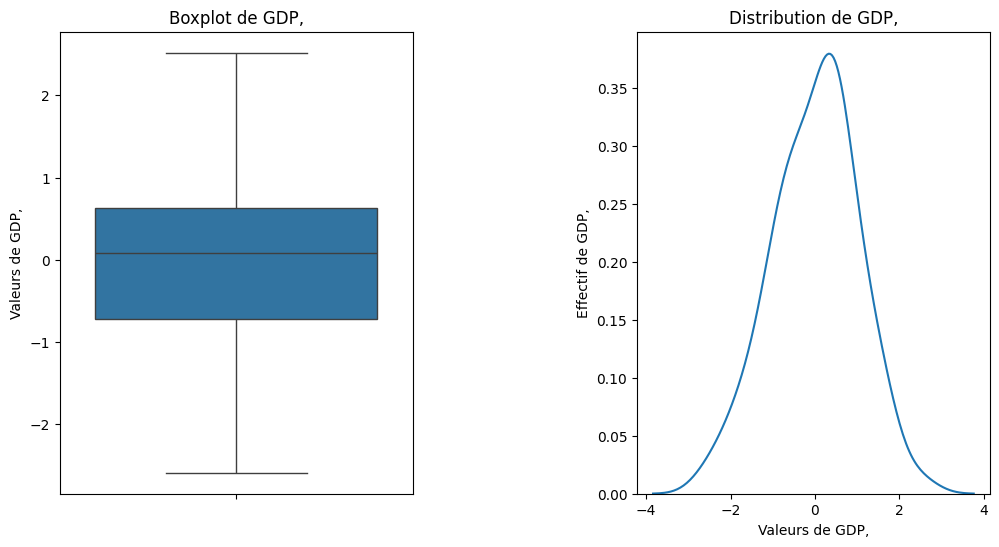

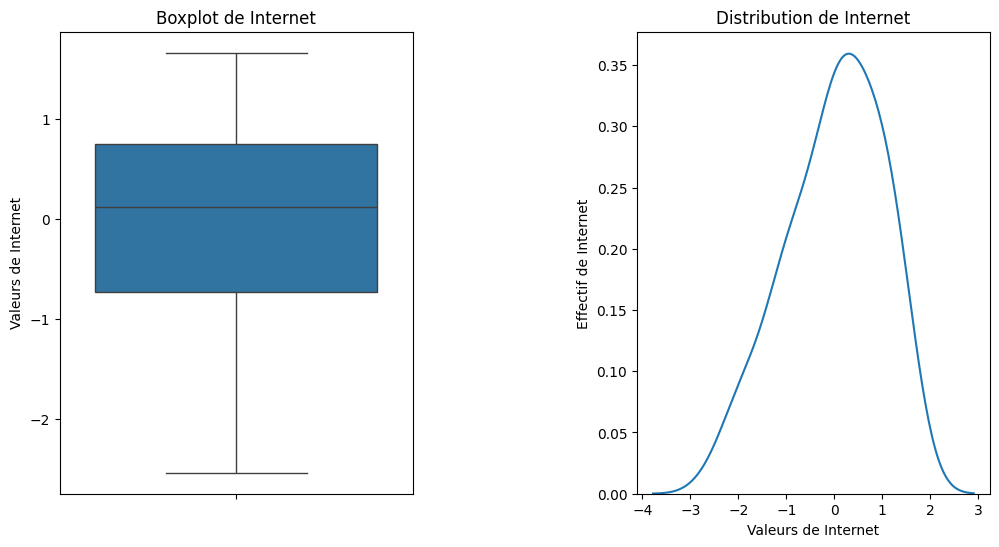

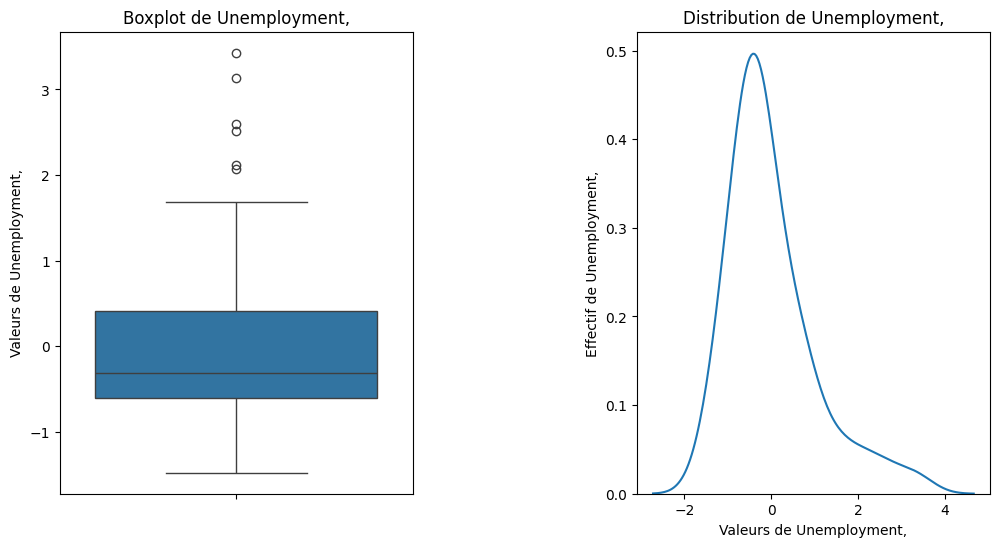

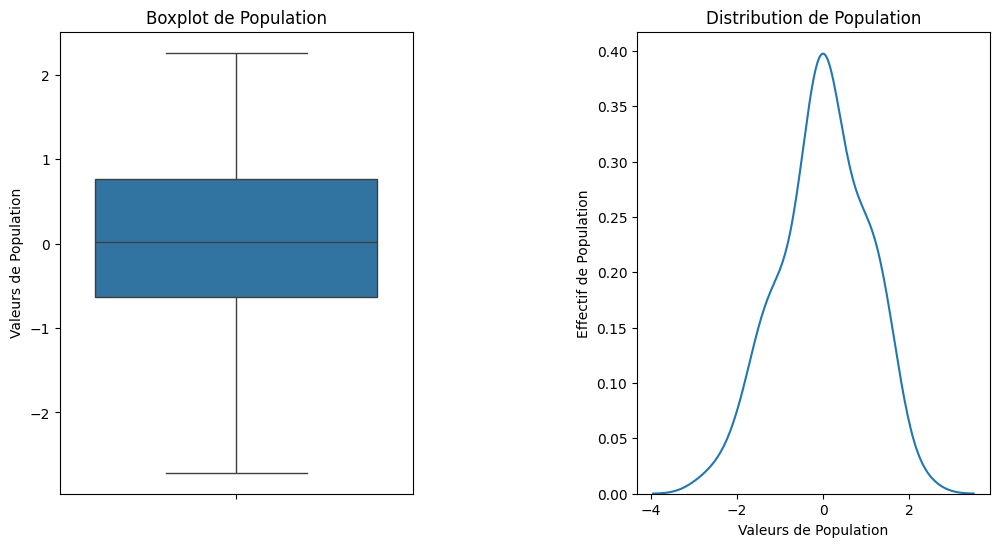

In [1089]:
# CREATION DE LA MOSAIQUE
# LA MOSAIQUE PERMET DE FACILEMENT GERER LES POSITIONS DES SUBPLOTS
for col in DF_Final.columns:
    if col not in ['Country Code','Short Name']:
        layout="""
        AACBB
        AACBB

        """

        fig,axd = plt.subplot_mosaic(layout,figsize=(12,6),dpi=100)
        # CREATION D'UN BOX PLOT EN UTILISANT SEABORN
        sns.boxplot(y=DF_Final[col],ax=axd['A'])
        axd['A'].set_title(f'Boxplot de {col.split(' ')[0]}')
        axd['A'].set_ylabel(f'Valeurs de {col.split(' ')[0]}')

        # CREATION D'UN HISTOGRAMME AVEC COURBE DE DENSITE EN UTILISANT SEABORN

        sns.kdeplot(DF_Final[col],ax=axd['B'])
        axd['B'].set_title(f'Distribution de {col.split(' ')[0]}')
        axd['B'].set_xlabel(f'Valeurs de {col.split(' ')[0]}')
        axd['B'].set_ylabel(f'Effectif de {col.split(' ')[0]}')

        axd['C'].axis('off')
        plt.show()

ON CONSTATE DES OUTLIERS DANS "Unemployment, total (% of total labor force)", NOTAMMENT LA GRECE ET L'ESPAGNE (C'EST EN PARTIE DU A LA PERIODE ETUDIEE QUI EST POST CRISE DES SUBPRIMES)

### HEATMAP DES CORRELATIONS

ON VA MAINTENANT CREER UNE HEATMAP DES CORRELATION

In [1090]:
#CREATION DE LA MATRICE DE CORRELATION
Mat_corr=DF_Final.drop(['Country Code','Short Name'],axis=1).corr(method='spearman')
Mat_corr

,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible
"GDP, PPP (current international $)",1.000000,0.364295,-0.265998,0.874145
Internet users (per 100 people),0.364295,1.000000,-0.259793,0.017549
"Unemployment, total (% of total labor force)",-0.265998,-0.259793,1.000000,-0.106763
Population Cible,0.874145,0.017549,-0.106763,1.000000


ON VOIT ICI LES CORRELATIONS ENTRE LES DIFFERENTES VARIABLES

1 INDIQUE UNE FORTE CORRELATION POSITIVE (QUAND UNE VARIABLE AUGMENTE L'AUTRE FAIT DE MEME)

-1 INDIQUE UNE FORTE CORRELATION NEGATIVE (QUAND UNE VARIABLE AUGMENTE L'AUTRE DIMINUE)

UTILISONS UNE HEATMAP POUR MIEUX PERCEVOIR LES CORRELATIONS

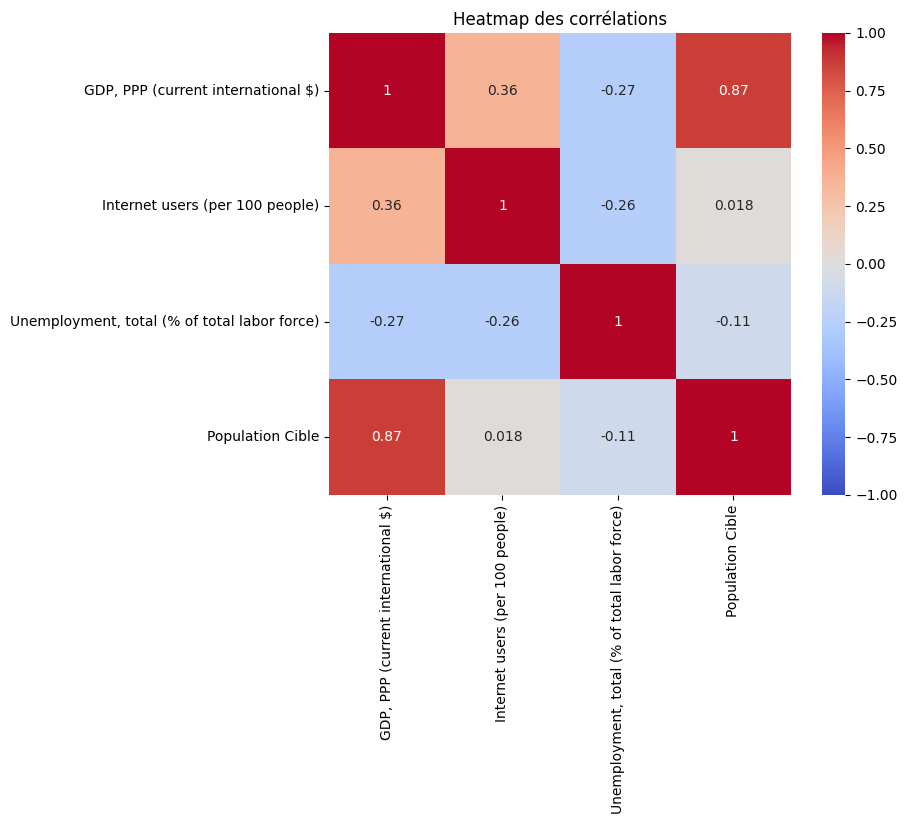

In [1091]:
fig,ax = plt.subplots(figsize=(8,6))

heatmap=sns.heatmap(Mat_corr,
                    annot=True, #PERMET D'AFFICHER LES VALEURS DANS LES CASES DE LA HEATMAP
                    cmap='coolwarm', #PALETTE DE COULEUR CHAUD/FROID
                    vmin=-1,vmax=1, #DEFINIT QUE LES VALEURS SERONT ENTRE -1 ET 1 POUR FACILITER LA COLORISATION
                    center=0, # LA PALETTE EST CENTREE SUR 0 LA ENCORE POUR UN SOUCIS DE PRATICITE
                    square=True, #GARANTIE QUE CHAQUE CASE SERA DE FORME CARREE
                    ax=ax)

plt.title('Heatmap des corrélations')
plt.show()

ON CONSTATE UNE FORTE CORRELATION POSITIVE ENTRE POPULATION CIBLE ET PIB

### CREATION DU SCORE

NOUS ALLONS CREER UNE VARIABLE "Score"

In [1092]:
DF_Final['Score']=DF_Final['GDP, PPP (current international $)']
+DF_Final['Internet users (per 100 people)']
+DF_Final['Population Cible']
-DF_Final['Unemployment, total (% of total labor force)']

0    -1.110867
1     0.309192
2    -1.459054
3     0.575453
4     0.647139
        ...   
80    0.312606
81    0.008795
82   -1.581944
83    0.281883
84    1.203556
Name: Unemployment, total (% of total labor force), Length: 85, dtype: float64

In [1093]:
DF_Final

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible,Score
0,ALB,Albania,-0.831991,-0.264872,1.110867,-0.231819,-0.831991
1,ARG,Argentina,0.926633,-0.117798,-0.309192,1.249483,0.926633
2,ARM,Armenia,-0.995096,-0.835279,1.459054,-0.407363,-0.995096
3,AUS,Australia,1.031193,0.954386,-0.575453,0.893596,1.031193
4,AUT,Austria,0.532350,0.894752,-0.647139,0.203604,0.532350
...,...,...,...,...,...,...,...
80,USA,United States,2.518838,0.499498,-0.312606,2.260622,2.518838
81,UZB,Uzbekistan,0.036982,-1.586619,-0.008795,1.084905,0.036982
82,VCT,St. Vincent and the Grenadines,-2.593397,-0.890840,1.581944,-2.714607,-2.593397
83,VEN,Venezuela,0.680324,-0.469247,-0.281883,0.769159,0.680324


### CREATION DE LA CARTE INTERACTIVE

In [1094]:
import geopandas as gpd

# CHARGER LES DONNEES GEOGRAPHIQUE DU MONDE
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

print("Les pays non présents dans la liste de geopandas sont :")
for pays in DF_Final['Short Name']:
    if pays not in world['name'].unique():
        print(pays)

Les pays non présents dans la liste de geopandas sont :
Bahrain
Bosnia and Herzegovina
Barbados
Cabo Verde
Czech Republic
Hong Kong SAR, China
Kyrgyz Republic
Korea
St. Lucia
Macao SAR, China
Maldives
Malta
Mauritius
Singapore
Slovak Republic
United States
St. Vincent and the Grenadines


MALTE, HONG KONG ET D'AUTRES N'EXISTENT PAS DANS LA LISTE DES PAYS DE GEOPANDAS

IL FAUT MODIFIER KOREA EN SOUTH KOREA, CZECH REPUBLIC EN CZECHIA ET D'AUTRES

In [1095]:
DF_Final.loc[DF_Final['Country Code']=='KOR','Short Name']='South Korea'
DF_Final.loc[DF_Final['Short Name']=='Czech Republic','Short Name']='Czechia'
DF_Final.loc[DF_Final['Short Name']=='Kyrgyz Republic','Short Name']='Kyrgyzstan'
DF_Final.loc[DF_Final['Short Name']=='Slovak Republic','Short Name']='Slovakia'
DF_Final.loc[DF_Final['Short Name']=='United States','Short Name']='United States of America'
DF_Final.loc[DF_Final['Short Name']=='Bosnia and Herzegovina','Short Name']='Bosnia and Herz.'


DF_Final

,Country Code,Short Name,"GDP, PPP (current international $)",Internet users (per 100 people),"Unemployment, total (% of total labor force)",Population Cible,Score
0,ALB,Albania,-0.831991,-0.264872,1.110867,-0.231819,-0.831991
1,ARG,Argentina,0.926633,-0.117798,-0.309192,1.249483,0.926633
2,ARM,Armenia,-0.995096,-0.835279,1.459054,-0.407363,-0.995096
3,AUS,Australia,1.031193,0.954386,-0.575453,0.893596,1.031193
4,AUT,Austria,0.532350,0.894752,-0.647139,0.203604,0.532350
...,...,...,...,...,...,...,...
80,USA,United States of America,2.518838,0.499498,-0.312606,2.260622,2.518838
81,UZB,Uzbekistan,0.036982,-1.586619,-0.008795,1.084905,0.036982
82,VCT,St. Vincent and the Grenadines,-2.593397,-0.890840,1.581944,-2.714607,-2.593397
83,VEN,Venezuela,0.680324,-0.469247,-0.281883,0.769159,0.680324


NOUS ALLONS DROP LES LIGNES DES PAYS QUI N'EXISTENT PAS DANS LA LISTE DE GEOPANDAS

In [1096]:
Pays_a_exclure = ['Bahrain','Barbados','Cabo Verde','Hong Kong SAR, China','St. Lucia','Macao SAR, China','Maldives',
                  'Malta','Mauritius','Singapore','St. Vincent and the Grenadines']
DF_Final=DF_Final[~DF_Final['Short Name'].isin(Pays_a_exclure)]
DF_Final=DF_Final.reset_index()
DF_Final=DF_Final.drop(['index'],axis=1)
print(f"Nous venons encore d'éliminer {round(11*100/242,2)} % des pays d'origine du Dataframe")



Nous venons encore d'éliminer 4.55 % des pays d'origine du Dataframe


ON VA CREER UNE MAP INTERACTIVE, CARTE CHOROPLETHE (CAD UNE CARTE AVEC DES COULEURS COMME INDICATEURS)

In [1097]:
import folium

# CHARGER LES DONNEES GEOGRAPHIQUES DU MONDE
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# FUSIONNER LES DONNEES AVEC LE GEODATAFRAME DU MONDE
world = world.merge(DF_Final, left_on='name', right_on='Short Name', how='left')

# CREER UNE CARTE CENTREE SUR LE MONDE
m = folium.Map(location=[0, 0], zoom_start=2)

# AJOUTER LA COUCHE CHOROPLETHE SEULEMENT POUR LES PAYS AVEC DES DONNEES
folium.Choropleth(
    geo_data=world,
    name='choropleth',
    data=world,
    columns=['name', 'Score'],
    key_on='feature.properties.name',
    fill_color='viridis',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='Score'
).add_to(m)

# AJOUTER UNE COUCHE GEOJSON POUR TOUT LES PAYS POUR AFFICHER LES FRONTIERES
folium.GeoJson(
    world,
    style_function=lambda feature: {
        'fillColor': 'white' if pd.isna(feature['properties']['Score']) else 'transparent',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.9 if pd.isna(feature['properties']['Score']) else 0.1,
    },
    tooltip=folium.GeoJsonTooltip(fields=['name', 'Score'], aliases=['Pays', 'Score'], localize=True)

).add_to(m)

# AJOUTER UN CONTRÔLE DE COUCHE
folium.LayerControl().add_to(m)


### AFFICHAGE DES 74 PAYS CONSERVES (ENVIRON 31 % DES PAYS INITIAUX)

In [1098]:
# AFFICHER LA CARTE
m

In [1099]:
m.save("world_map.html")